<a href="https://colab.research.google.com/github/bhavani12860/Fmml-labs/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

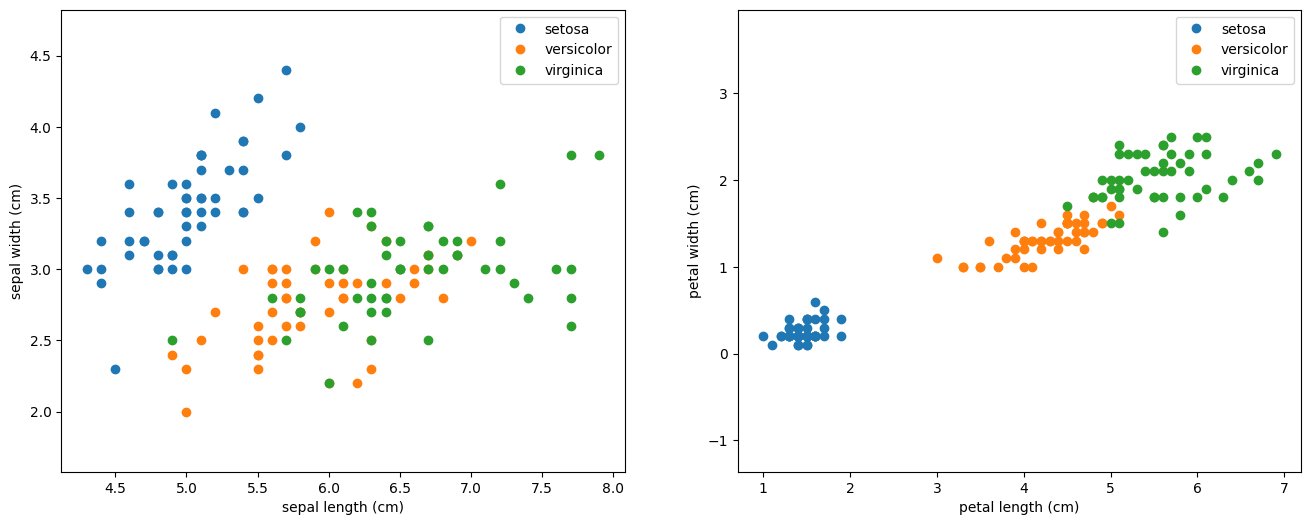

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [6]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [7]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [8]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [9]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 374.26it/s]


# Plot training progress

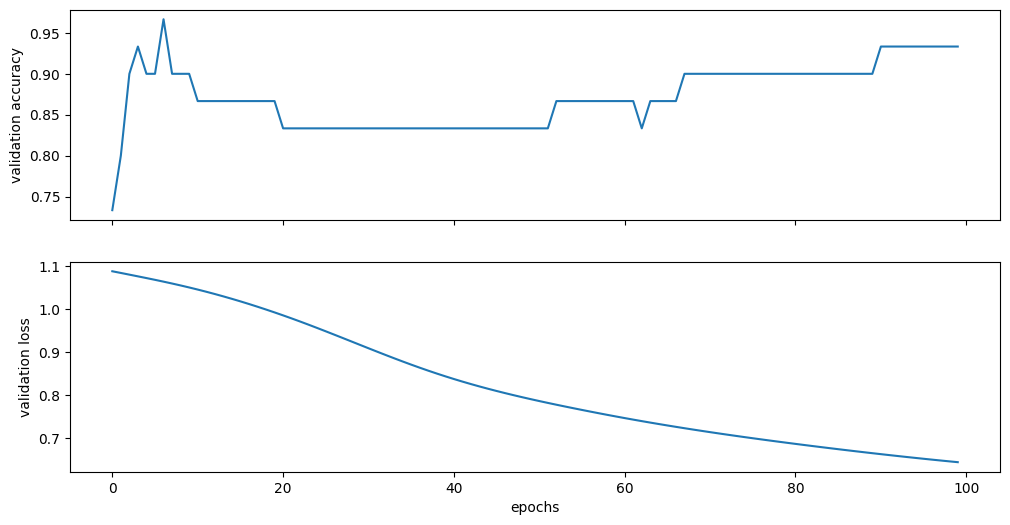

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

In [2]:
!pip install tensorflow
import tensorflow as tf

# Assuming input_dim and output_dim are defined elsewhere, for example:
input_dim = 4  # Number of features in the Iris dataset
output_dim = 3  # Number of classes in the Iris dataset

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


You're diving into the core of neural network tuning — awesome! Here's a hands-on breakdown of how to experiment with neural network architecture using your 3 tuning knobs:

🧪 Architecture Experiment: Full Setup
Let’s say you’re working on a classification problem (e.g., MNIST, Iris, etc.) and you want to experiment with:

Number of hidden layers

Number of neurons in each hidden layer

Activation functions
Step 2: Vary Hidden Layers
Model	Architecture	Notes
A	1 hidden layer (64 neurons)	Baseline
B	2 hidden layers (64-32)	Deeper, moderate capacity
C	3 hidden layers (128-64-32)	Deep model
🧮 Step 3: Vary Neurons per Layer
Model	Hidden Layers Configuration	Notes
D	64	Too small?
E	128	Better?
F	512	May overfit without dropout
⚡ Step 4: Try Different Activation Functions
Model	Activation Function	Notes
G	relu (default)	Fast, strong baseline
H	sigmoid	May cause vanishing gradients
I	tanh	Zero-centered, can be unstable
J	leaky_relu	Better gradient flow
K	swish or elu	Advanced, sometimes outperforms
📊 What to Observe
Training accuracy/loss: Is it improving? Too slowly?

Validation accuracy/loss: Are we overfitting or underfitting?

Convergence speed: Does training stall or progress?

Loss curves: Smooth, jumpy, flat?

🔎 Sample Observations
Change	Observation
More hidden layers	Better learning, but risk of overfitting
More neurons	Faster fitting, risk of memorizing data
sigmoid vs relu	sigmoid trains slower, may not converge
leaky_relu or swish	May improve performance & stability
✅ Final Tip
Log your results for each configuration! Example log:

Model	Layers	Neurons	Activation	Train Acc	Val Acc	Notes
A	1	64	relu	95%	90%	Baseline
B	3	128-64-32	relu	99%	87%	Overfitting
C	2	64	tanh	93%	85%	Slow training
D	2	128	swish	98%	92%	Best so far!



